<a href="https://colab.research.google.com/github/farhan1503001/Generative-Deep-Learning-With-Tensorflow/blob/main/CNN%20Autoencoder/CNN_Autoencoder_Using_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN Based Autoencoder Model

**Importing Libraries**

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

**Utility Function**

In [2]:
def map_image(image,label):
  image=tf.cast(image,dtype=tf.float32)
  image=image/255.0

  return image,image

**Loading Data**

In [3]:
Batch_size=128
Shuffle_buffer=1024
train_dataset = tfds.load('fashion_mnist', as_supervised=True, split="train")
train_dataset = train_dataset.map(map_image)
train_dataset = train_dataset.shuffle(Shuffle_buffer).batch(Batch_size).repeat()

test_dataset = tfds.load('fashion_mnist', as_supervised=True, split="test")
test_dataset = test_dataset.map(map_image)
test_dataset = test_dataset.batch(Batch_size).repeat()


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteUO74TT/fashion_mnist-train.tfrecord


  0%|          | 0/60000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteUO74TT/fashion_mnist-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


# Building CNN Autoencoder

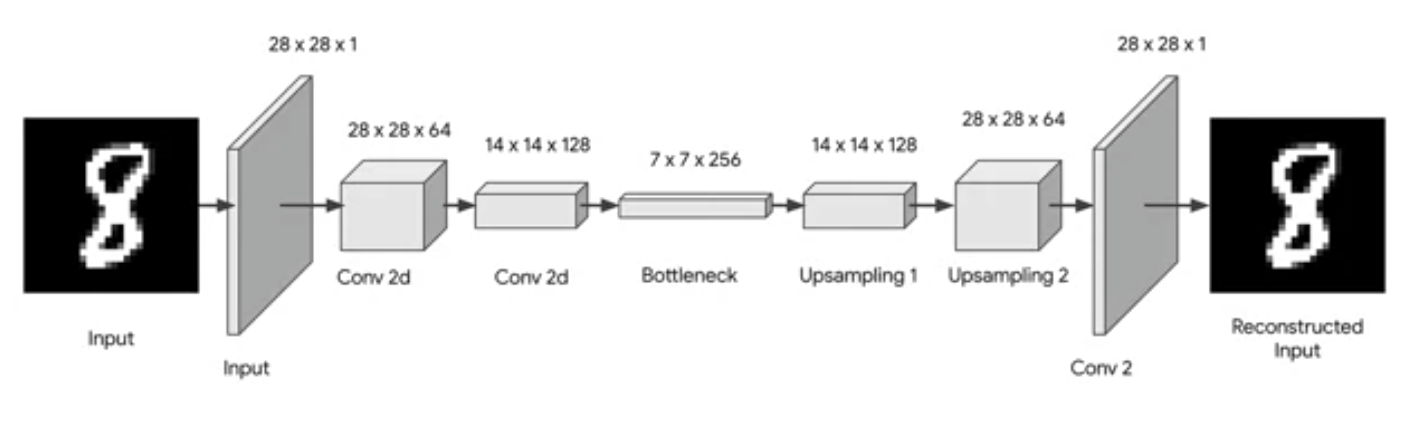


In [4]:
def cnn_encoder(inputs):
  conv1=keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu')(inputs)
  #maxpooling
  max_pool1=keras.layers.MaxPooling2D(pool_size=(2,2))(conv1)
  #another conv
  conv2=keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu')(max_pool1)
  #another maxpool
  max_pool2=keras.layers.MaxPooling2D(pool_size=(2,2))(conv2)
  #returning maxpooling output 7,7,128
  return max_pool2

In [5]:
#Defining our bottleneck function
def bottle_neck(inputs):
  bottle_neck=keras.layers.Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu')(inputs)
  #made it 7*7*256
  encoder_visualization=keras.layers.Conv2D(filters=1,kernel_size=(3,3),padding='same',activation='sigmoid')(bottle_neck)

  return bottle_neck,encoder_visualization

In [6]:
#Defining our decoder making function
def cnn_decoder(inputs):
  conv1=keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu')(inputs)
  #upsampling for making 14*14*128
  up_sample1=keras.layers.UpSampling2D(size=(2,2))(conv1)
  #Another conv
  conv2=keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu')(up_sample1)
  #Another upsample
  up_sample2=keras.layers.UpSampling2D(size=(2,2))(conv2)
  conv3=keras.layers.Conv2D(filters=1,kernel_size=(3,3),padding='same',activation='sigmoid')(up_sample2)

  return conv3
  

**Combining all the blocks**

In [7]:
def cnn_autoencoder():

  inputs=keras.layers.Input(shape=(28,28,1))
  encoder_out=cnn_encoder(inputs)
  bottle_neck_out,visualization_out=bottle_neck(encoder_out)
  decoder_out=cnn_decoder(bottle_neck_out)

  #create autoencoder
  autoencoder_model=keras.Model(inputs=inputs,outputs=decoder_out)
  encoder_model=keras.Model(inputs=inputs,outputs=visualization_out)

  return autoencoder_model,encoder_model


In [8]:
cnn_model,cnn_encoder_model=cnn_autoencoder()
cnn_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 256)         295168

In [9]:
train_steps=60000//Batch_size
valid_steps=60000//Batch_size
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy')
cnnmodel_history = cnn_model.fit(train_dataset, steps_per_epoch=train_steps, validation_data=test_dataset, validation_steps=valid_steps, epochs=40)

Epoch 1/40
468/468 [==============================] - 27s 32ms/step - loss: 0.2884 - val_loss: 0.2667
Epoch 2/40
468/468 [==============================] - 13s 27ms/step - loss: 0.2608 - val_loss: 0.2657
Epoch 3/40
468/468 [==============================] - 13s 27ms/step - loss: 0.2557 - val_loss: 0.2560
Epoch 4/40
468/468 [==============================] - 12s 27ms/step - loss: 0.2530 - val_loss: 0.2539
Epoch 5/40
468/468 [==============================] - 13s 27ms/step - loss: 0.2513 - val_loss: 0.2526
Epoch 6/40
468/468 [==============================] - 13s 27ms/step - loss: 0.2504 - val_loss: 0.2520
Epoch 7/40
468/468 [==============================] - 13s 27ms/step - loss: 0.2495 - val_loss: 0.2512
Epoch 8/40
468/468 [==============================] - 13s 27ms/step - loss: 0.2489 - val_loss: 0.2505
Epoch 9/40
468/468 [==============================] - 13s 27ms/step - loss: 0.2483 - val_loss: 0.2501
Epoch 10/40
468/468 [==============================] - 13s 27ms/step - loss: 0.248

In [10]:
def display_one_row(disp_images, offset, shape=(28, 28)):
  '''Display sample outputs in one row.'''
  for idx, test_image in enumerate(disp_images):
    plt.subplot(3, 10, offset + idx + 1)
    plt.xticks([])
    plt.yticks([])
    test_image = np.reshape(test_image, shape)
    plt.imshow(test_image, cmap='gray')


def display_results(disp_input_images, disp_encoded, disp_predicted, enc_shape=(8,4)):
  '''Displays the input, encoded, and decoded output values.'''
  plt.figure(figsize=(15, 5))
  display_one_row(disp_input_images, 0, shape=(28,28,))
  display_one_row(disp_encoded, 10, shape=enc_shape)
  display_one_row(disp_predicted, 20, shape=(28,28,))

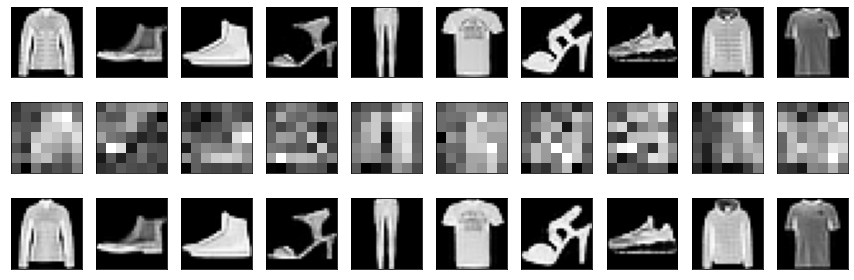

In [12]:
# take 1 batch of the dataset
test_dataset = test_dataset.take(1)

# take the input images and put them in a list
output_samples = []
for input_image, image in tfds.as_numpy(test_dataset):
      output_samples = input_image

# pick 10 indices
idxs = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# prepare test samples as a batch of 10 images
conv_output_samples = np.array(output_samples[idxs])
conv_output_samples = np.reshape(conv_output_samples, (10, 28, 28, 1))

# get the encoder ouput
encoded = cnn_encoder_model.predict(conv_output_samples)

# get a prediction for some values in the dataset
predicted = cnn_model.predict(conv_output_samples)

# display the samples, encodings and decoded values!
display_results(conv_output_samples, encoded, predicted, enc_shape=(7,7))